# Uber Data Analysis

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
import warnings
warnings.filterwarnings("ignore")

In [125]:
df=pd.read_csv('UberDataset.csv')

In [126]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [127]:
df.shape

(1156, 7)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Data Preprocessing

In [129]:
df['PURPOSE'].fillna('Not Available', inplace= True)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [131]:
df['START_DATE']= pd.to_datetime(df['START_DATE'], errors= 'coerce')

df['END_DATE']= pd.to_datetime(df['END_DATE'], errors= 'coerce')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [133]:
from datetime import datetime

df['DATE']= pd.DatetimeIndex(df['START_DATE']).date
df['TIME']= pd.DatetimeIndex(df['START_DATE']).hour

In [134]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [135]:
df['DAY-NIGHT']= pd.cut(x=df['TIME'], bins= [0,10,15,19,24], labels= ['Morning', 'Afternoon', 'Evening', 'Night'])

In [136]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [137]:
df.dropna(inplace=True)

In [138]:
df.shape

(413, 10)

## Data Visualization

### 1. In which category do people book the most uber rides. For which purpose do people book uber rides the most.

<Axes: xlabel='count', ylabel='PURPOSE'>

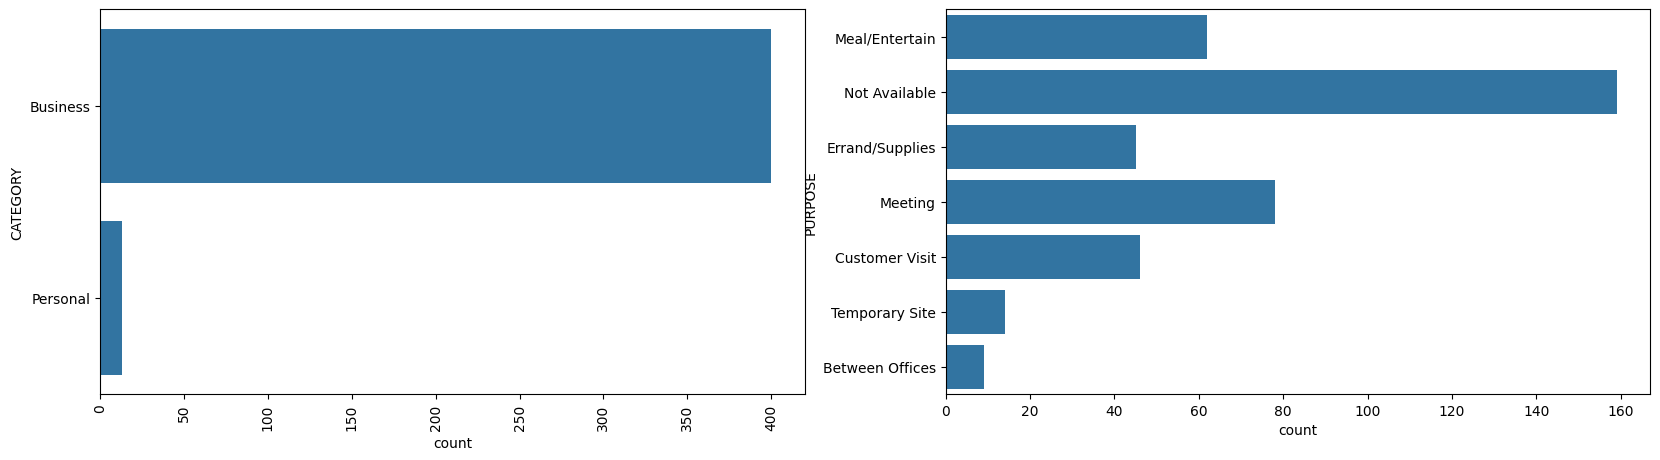

In [139]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)

sns.countplot(df['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(df['PURPOSE'])

### Conclusion: The business category people book the most uber rides. The purpose of people booking uber rides is to attend the meetings.

###

### 2. At what time do people book the cabs the most from uber.

<Axes: xlabel='count', ylabel='DAY-NIGHT'>

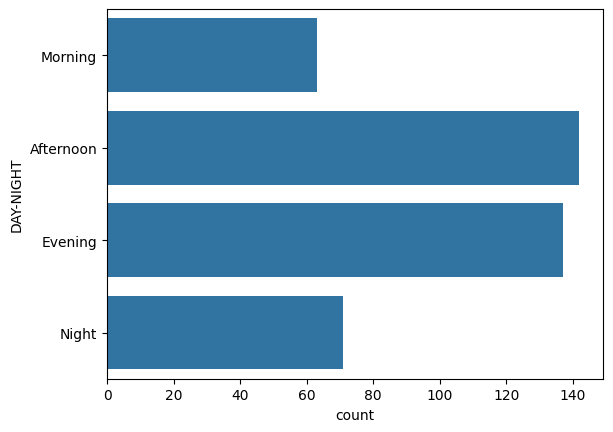

In [140]:
sns.countplot(df['DAY-NIGHT'])

### Conclusion: People book Uber cabs the most in the afternoon.

### 

### 3. In which months do people book uber rides less frequently.

In [141]:
df['MONTH']= pd.DatetimeIndex(df['START_DATE']).month

month_label= {1.0: 'Jan', 2.0: 'Feb',3.0: 'Mar',4.0: 'Apr',5.0: 'May',6.0: 'Jun',7.0: 'Jul',
              8.0: 'Aug',9.0: 'Sep',10.0: 'Oct',11.0: 'Nov',12.0: 'Dec'} 

df['MONTH']=df.MONTH.map(month_label)

mon=df.MONTH.value_counts(sort=False)

In [142]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

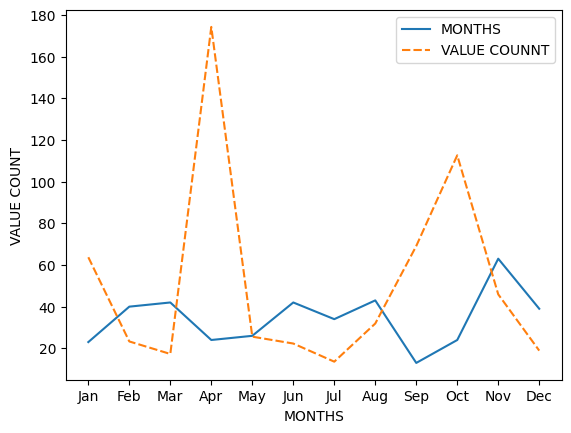

In [143]:
data=pd.DataFrame({
    "MONTHS": mon.values,
    "VALUE COUNNT": df.groupby("MONTH", sort=False)['MILES'].max()})

p=sns.lineplot(data=data)
p.set(xlabel="MONTHS",ylabel="VALUE COUNT")

### Conclusion: Uber rides are booked less frequently in November, December, and January.

### 

### 4. On which days of the week do people book uber rides the most.

In [144]:
df['DAY'] = df.START_DATE.dt.weekday

day_label = {
    0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}

df['DAY'] = df['DAY'].map(day_label)

In [145]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


Text(0, 0.5, 'Count')

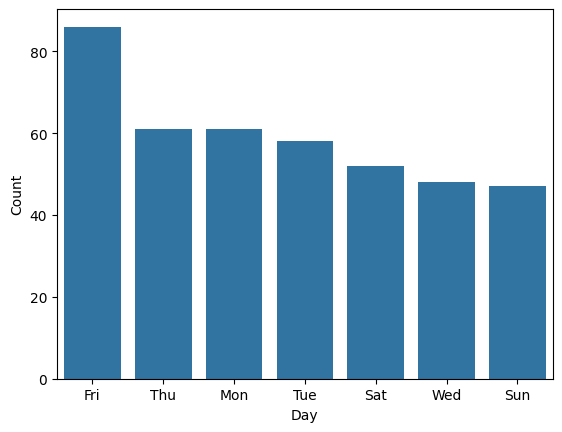

In [146]:
day_label= df.DAY.value_counts()

sns.barplot(x=day_label.index, y=day_label)
plt.xlabel("Day")
plt.ylabel("Count")

### Conclusion: People book Uber rides the most on Friday, Thursday, and Monday.

### 

### 5. How many miles do people usually book a cab for through uber.

<Axes: ylabel='MILES'>

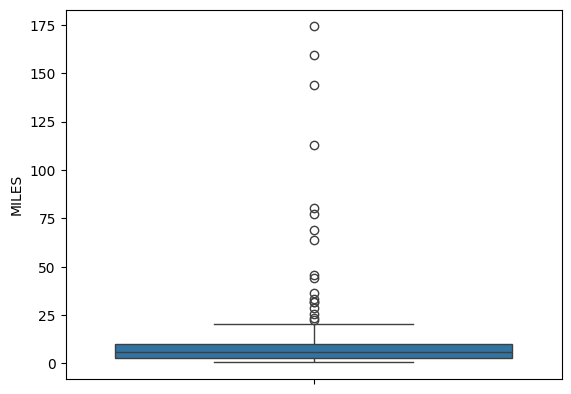

In [147]:
sns.boxplot(df['MILES'])

<Axes: ylabel='MILES'>

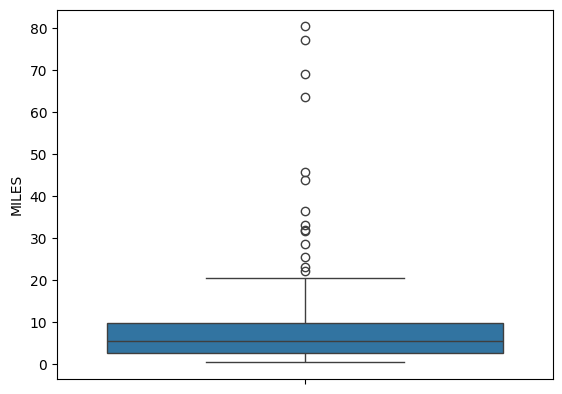

In [148]:
sns.boxplot(df[df['MILES']<100]['MILES'])

<Axes: xlabel='MILES', ylabel='Density'>

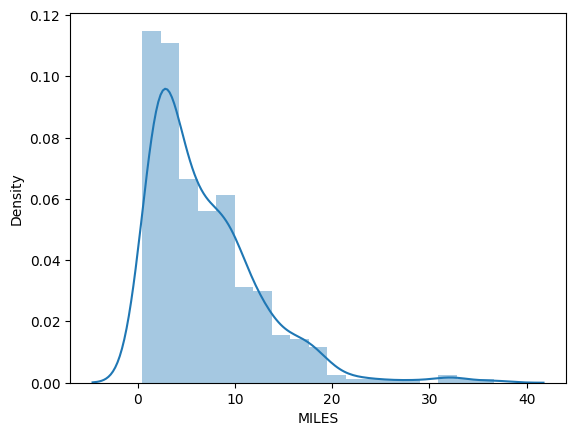

In [149]:
sns.distplot(df[df['MILES']<40]['MILES'])

### Conclusion: People usually book Uber rides for 0-10 miles.